In [1]:
%matplotlib inline
# import mpld3
# mpld3.enable_notebook()

%load_ext autoreload

In [2]:
import sys
sys.path.insert(0, "../")

import pickle
import math as m
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from experiment_utils import plot_history
from rotation_rate_utils import plot_layerwise_angle_deviation_curves

/home/sicarbonnell/anaconda3/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
with open('../results.p','rb') as f:
    results = pickle.load(f)

In [4]:
# specifies the adaptive gradient method that was used for each task
adaptive_optimizers = {'C10-CNN1':'RMSprop','C100-resnet':'Adam','tiny-CNN':'Adagrad','C10-CNN2':'RMSprop_weight_decay','C100-WRN':'Adam_weight_decay'}

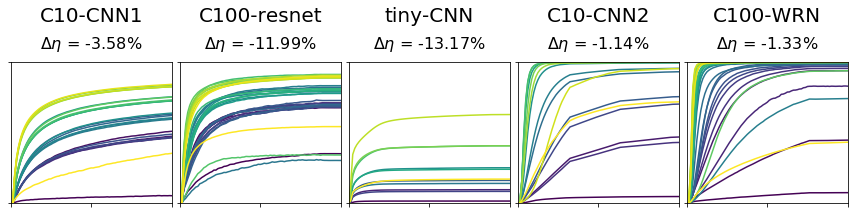

In [9]:
matplotlib.rcParams.update({'font.size': 15})
tasks = ['C10-CNN1','C100-resnet','tiny-CNN', 'C10-CNN2','C100-WRN']
f, axes = plt.subplots(1,len(tasks), figsize = (3*len(tasks),2.6))
axes = np.array([axes])
for i,task in enumerate(tasks):
    plot_layerwise_angle_deviation_curves(results[task][adaptive_optimizers[task]]['ladc'], ax = axes[0,i])
    
    ref_performance = results[task]['SGD_layca'][0.][3**-3]['test_performance'][1]
    axes[0,i].set_title('$\Delta \eta$ = '+str(round((results[task][adaptive_optimizers[task]]['test_performance'][1]-ref_performance)*100,2))+'%',fontsize=16, y=1.05)
    
    axes[0,i].set_xlim([0,80])
    axes[0,i].set_xticks([0,40,80])
    axes[0,i].set_ylim([0,1])
    axes[0,i].set_yticks([0,1])
    
    axes[0,i].set_ylabel('')
    axes[0,i].set_yticklabels('')
    axes[0,i].set_xlabel('')
    axes[0,i].set_xticklabels('')
    
    pad = 40
    size = 20
    axes[0,i].annotate(task, xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size=size, ha='center', va='baseline')
plt.subplots_adjust(hspace=0.35,wspace=0.05)
plt.savefig('figures/AGM_analysis_curves.png',format='png', dpi=200, bbox_inches="tight")


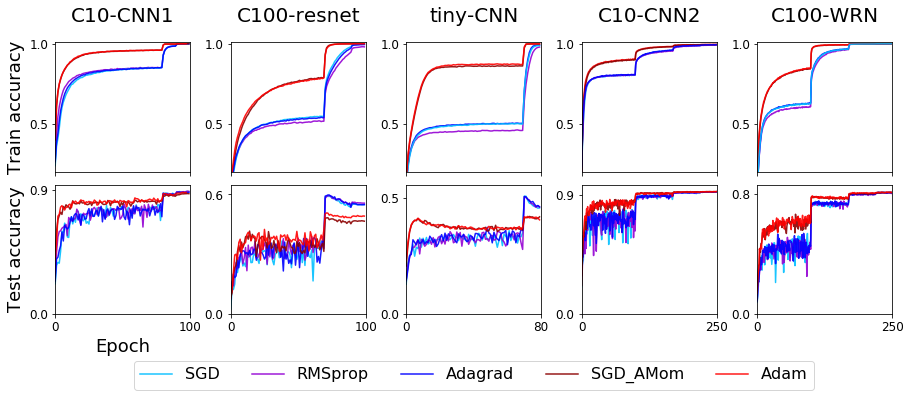

In [7]:
from random import shuffle

matplotlib.rcParams.update({'font.size': 12})
tasks = ['C10-CNN1','C100-resnet','tiny-CNN', 'C10-CNN2','C100-WRN']
colors = {'SGD_layca':'deepskyblue','RMSprop_layca':'darkviolet','Adagrad_layca':'blue', 'SGD_AMom_layca':'darkred','Adam_layca':'red'}

f, axes = plt.subplots(2,len(tasks), figsize = (3*len(tasks),5),sharex = 'col') #,sharey=True
for i,task in enumerate(tasks):
    for j, plotted_set in enumerate(['','val_']):
        optimizers = ['SGD_layca','RMSprop_layca','Adagrad_layca','SGD_AMom_layca','Adam_layca']
        if j==0:
            shuffle(optimizers) # randomly change the order in which curves are plotted (since curves overlap, the last curve plotteed is the most visible)
        
        max_acc = -1
        for optimizer in optimizers:
            alpha = 0.
            lr = 3**-5 if optimizer in ['SGD_AMom_layca','Adam_layca'] else 3**-3
            data = results[task][optimizer]['history'] if task in ['C10-CNN2','C100-WRN'] else results[task][optimizer][alpha][lr]['history']

            axes[j,i].plot(data['epoch'],data['history'][plotted_set+'acc'],'-', color = colors[optimizer], label = optimizer[:-6],alpha = 0.9)
            max_acc = max(round(max(data['history'][plotted_set+'acc']),2),max_acc)
            
        if j == 0:
            axes[j,i].set_yticks([0.5,1.])
            axes[j,i].set_ylim([0.2,1.01])
        else:
            axes[j,i].set_yticks([0.,round(max_acc,1)])
            axes[j,i].set_ylim([0.,max_acc+0.05])

        axes[j,i].set_xticks([0.,round(data['epoch'][-1],-1)])
        axes[j,i].set_xlim([0.,round(data['epoch'][-1],-1)])
        
    pad = 20
    size = 20
    axes[0,i].annotate(task, xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size=size, ha='center', va='baseline')


axes[0,0].set_ylabel('Train accuracy',size = 18)
axes[1,0].set_ylabel('Test accuracy',size = 18)
axes[1,0].set_xlabel('Epoch',size = 18)
plt.subplots_adjust(hspace=0.1,wspace=0.3)

axes[-1,-3].legend(loc='upper center', bbox_to_anchor=(0.5, -0.3),
          fancybox=True, ncol=5,fontsize = 16)

plt.savefig('figures/AGM_analysis_histories.eps',format='eps', dpi=200, bbox_inches="tight")

In [5]:
tasks = ['C10-CNN1','C100-resnet','tiny-CNN', 'C10-CNN2','C100-WRN']
for i,task in enumerate(tasks):
    print(round(results[task][adaptive_optimizers[task]]['history']['history']['acc'][-1],4))

1.0
0.9998
0.9997
0.9872
0.9992
